# Seaborn 한번에 제대로 배우기


## Seaborn 특징

* 여러 변수 간의 관계를 검사하기 위한 데이터 집합 지향 API
* 범주형 변수를 사용하여 관측치 또는 집계 통계량을 표시하기 위한 전문적인 지원
* 일변량 또는 이변량 분포를 시각화하고 데이터의 부분 집합 간 비교하기 위한 옵션
* 서로 다른 종류의 종속 변수에 대한 선형 회귀 모형의 자동 추정 및 표시
* 복잡한 데이터셋의 전체 구조에 대한 편리한 보기
* 복잡한 시각화를 쉽게 구축할 수 있는 다중 플롯 그리드 구조를 위한 높은 수준의 추상화
* 여러 테마가 내장된 matplotlib 그림 스타일링 제어
* 데이터의 패턴을 충실히 나타내는 색상 팔레트 선택 도구

In [2]:
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import numpy as np
import pandas as pd  
from scipy import stats

## 산점도(Scatter Plot)

In [4]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
penguins.shape

(344, 7)

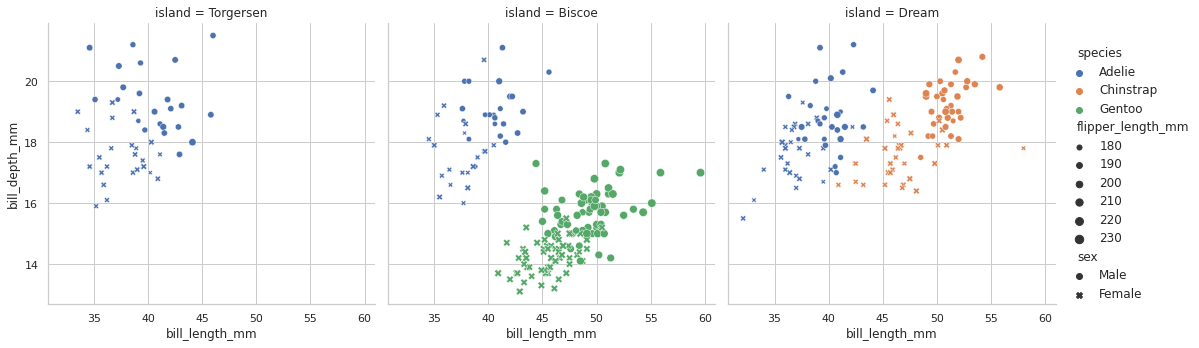

In [25]:
sns.relplot(x = 'bill_length_mm', y = 'bill_depth_mm', 
            hue = 'species', # 색상
            col = 'island', # 범주별로 열을 다르게
            style = 'sex', # 모양
            size = 'flipper_length_mm', # 크기
            data = penguins);

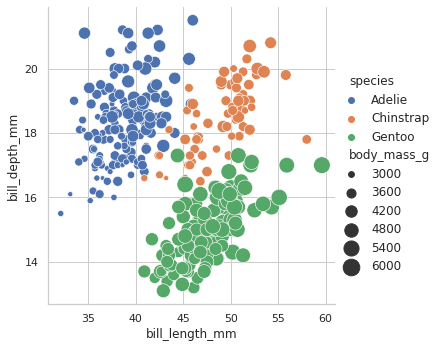

In [30]:
sns.relplot(x = 'bill_length_mm', y = 'bill_depth_mm', 
            hue = 'species', size = 'body_mass_g', 
            sizes = (10, 300), # 크기의 범위
            data = penguins);

## 라인 플롯(Line Plot)

In [32]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


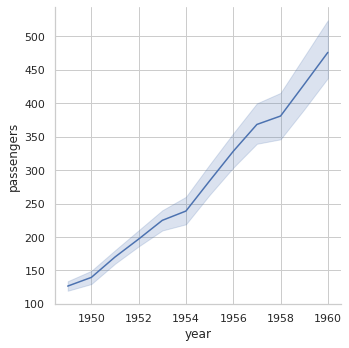

In [35]:
sns.relplot(x = "year", y = 'passengers', kind = 'line', # 라인 플롯 
            data = flights);

In [36]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


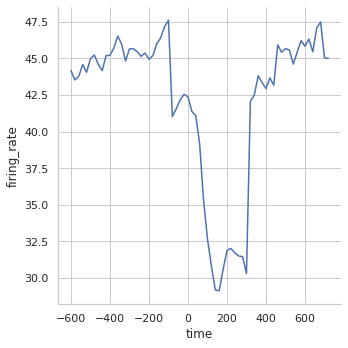

In [38]:
sns.relplot(x = "time", y = 'firing_rate', kind = 'line', ci = None, # 신뢰구간 미표시 
            data = dots);

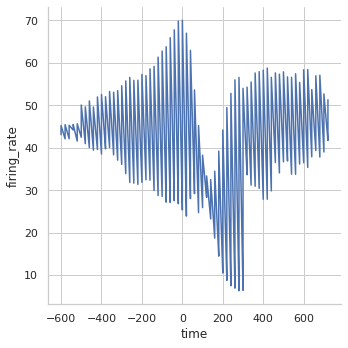

In [39]:
sns.relplot(x = "time", y = 'firing_rate', kind = 'line', estimator = None, 
            data = dots);

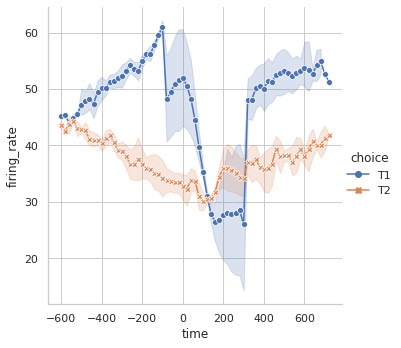

In [49]:
sns.relplot(x = "time", y = 'firing_rate', kind = 'line',
            hue = 'choice', # choice별로 색을 다르게
            style = 'choice', # choice별로 모양을 다르게 
            dashes = False, 
            markers = True, # 구간별로 점 표시
            data = dots);

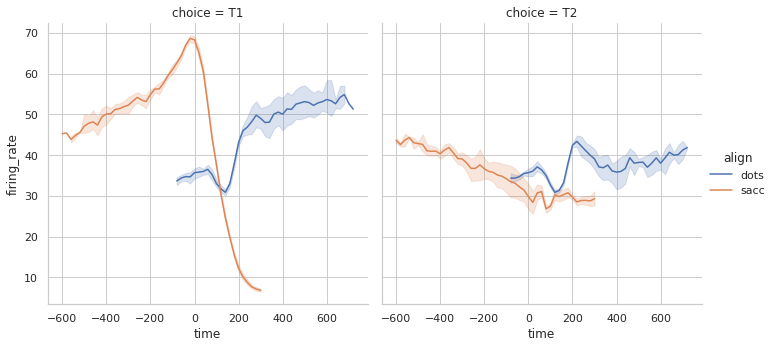

In [52]:
sns.relplot(x = "time", y = 'firing_rate', kind = 'line',
            hue = 'align', col = 'choice',
            data = dots);

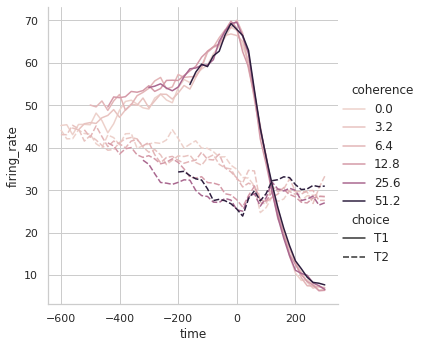

In [58]:
sns.relplot(x = "time", y = 'firing_rate', kind = 'line',
            style = 'choice', hue = 'coherence',
            data = dots.query("align == 'sacc'")); # 지정한 데이터에 대해서만 시각화

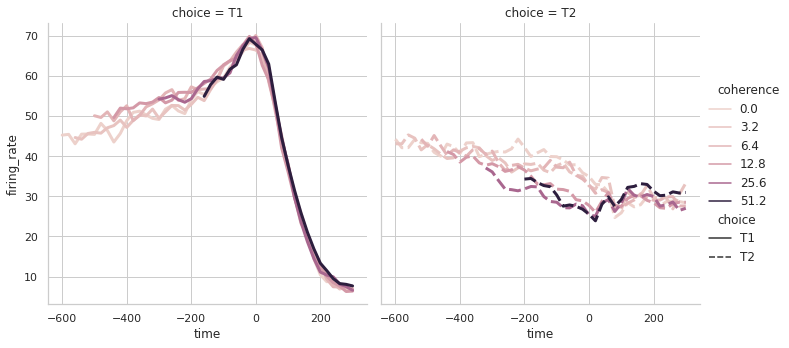

In [61]:
sns.relplot(x = "time", y = 'firing_rate', kind = 'line',
            style = 'choice', hue = 'coherence', col = 'choice',
            linewidth = 3, # 선 두께
            data = dots.query("align == 'sacc'")); # 지정한 데이터에 대해서만 시각화

In [62]:
tdf = pd.DataFrame(np.random.randn(40, 4),
                   index = pd.date_range('2020-01-01', periods = 40),
                   columns = ['A', 'B', 'C', 'D'])
tdf.head()

,A,B,C,D
2020-01-01,-1.129512,-0.113001,-1.409317,-0.582793
2020-01-02,0.241900,1.956451,1.200407,1.513431
2020-01-03,0.442798,-0.230053,1.220156,2.294767
2020-01-04,-0.675250,-1.555867,-0.868407,0.484697
2020-01-05,0.747861,0.827613,-0.996200,-1.266071


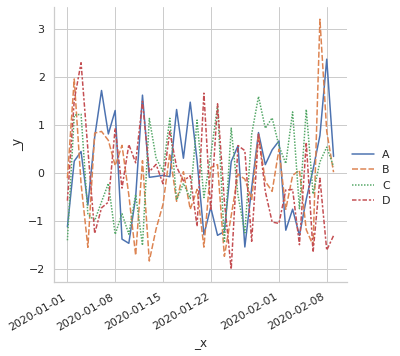

In [67]:
g = sns.relplot(kind = 'line', data = tdf)
g.fig.autofmt_xdate()

## 범주형 데이터(Categorical Data)

### 범주형 산점도(Categorical scatterplots)

* `stripplot()` (with `kind="strip"`; the default)
* `swarmplot()` (with `kind="swarm"`)

In [68]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


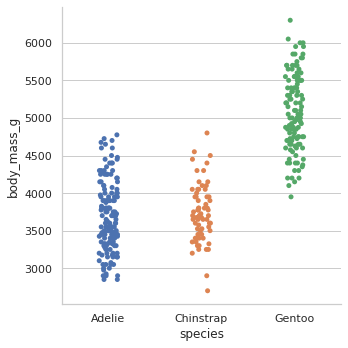

In [69]:
sns.catplot(x = 'species', y = 'body_mass_g', data = penguins);

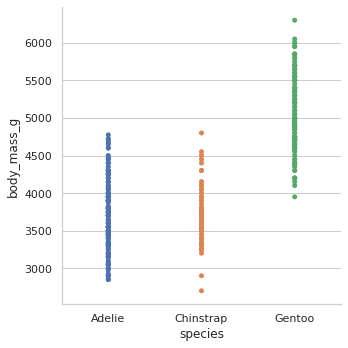

In [70]:
sns.catplot(x = 'species', y = 'body_mass_g', 
            jitter = False, 
            data = penguins);

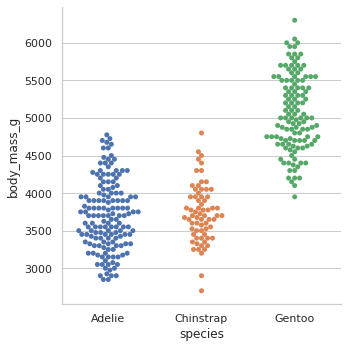

In [71]:
sns.catplot(x = 'species', y = 'body_mass_g', 
            kind = 'swarm', # 겹치지 않게 펼침
            data = penguins);

In [77]:
np.unique(penguins.species)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

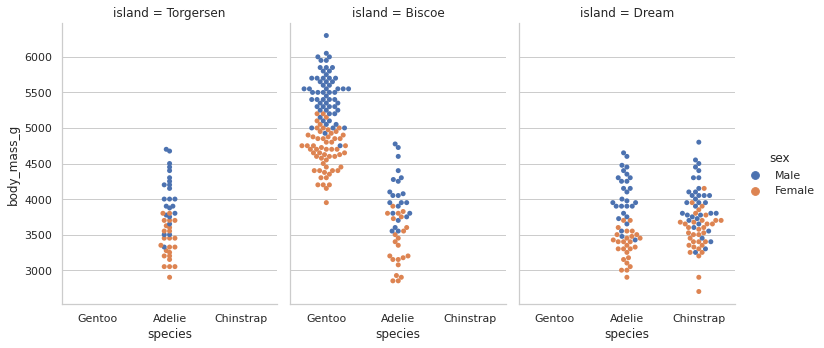

In [80]:
sns.catplot(x = 'species', y = 'body_mass_g', 
            kind = 'swarm', # 겹치지 않게 펼침
            hue = 'sex', 
            col = 'island', aspect = .7, # 열간격
            order = ["Gentoo", "Adelie", "Chinstrap"], # 정렬 순서 변경
            data = penguins);

### 범주형 분포도(Categorical distribution plots):

* `boxplot()` (with `kind="box"`)
* `boxenplot()` (with `kind="boxen"`)
* `violinplot()` (with `kind="violin"`)

#### 박스 플롯(Box plots)

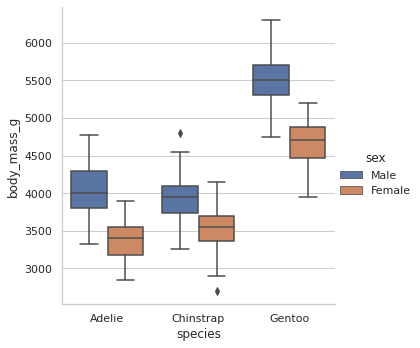

In [82]:
sns.catplot(x = 'species', y = 'body_mass_g', hue = 'sex',
            kind = 'box', data = penguins);

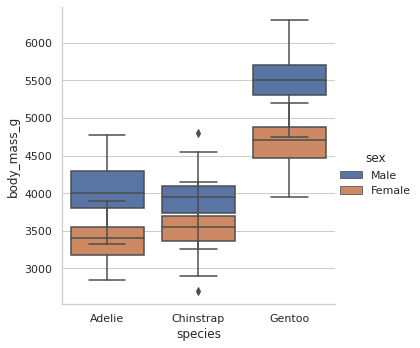

In [83]:
sns.catplot(x = 'species', y = 'body_mass_g', hue = 'sex', 
            dodge = False, # boxplot을 겹치게 
            kind = 'box', data = penguins);

In [85]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


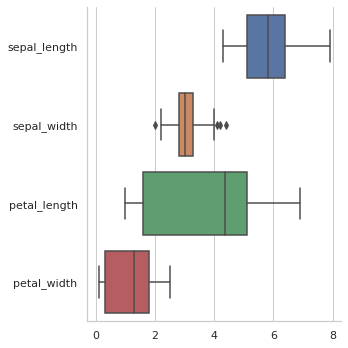

In [89]:
sns.catplot(kind = "box", orient = 'h', # 축 전환
            data = iris);

#### 박슨 플롯(Boxen plots) : 분포 모양도 표현

In [90]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


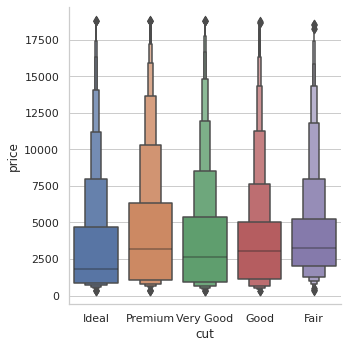

In [94]:
sns.catplot(x = 'cut', y = 'price', data = diamonds.sort_values("cut"),
            kind = 'boxen');

#### 바이올린 플롯(Violin plots)

* `violinplot`: 커널 밀도 추정과 상자 도표 결합

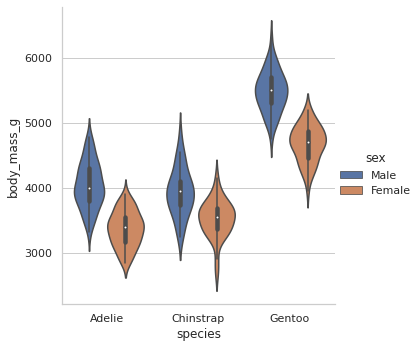

In [99]:
sns.catplot(x = 'species', y = 'body_mass_g', data = penguins,
            kind = 'violin', hue = 'sex');

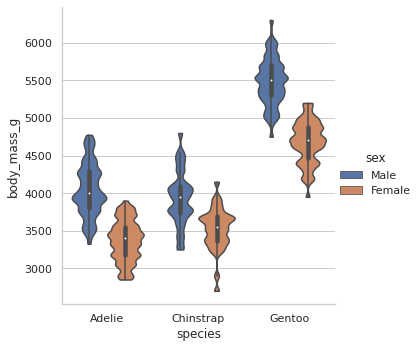

In [98]:
sns.catplot(x = 'species', y = 'body_mass_g', data = penguins,
            kind = 'violin', hue = 'sex',
            bw = 0.15, cut = 0);

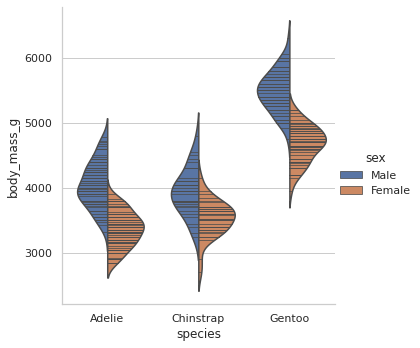

In [101]:
sns.catplot(x = 'species', y = 'body_mass_g', data = penguins,
            kind = 'violin', hue = 'sex', 
            inner = 'stick', split = True);

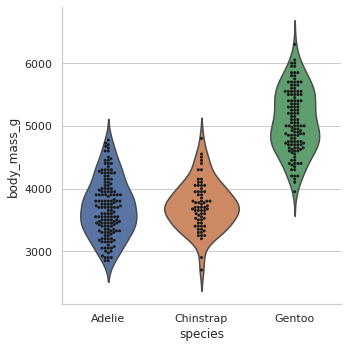

In [103]:
g = sns.catplot(x = 'species', y = 'body_mass_g', data = penguins,
                kind = 'violin', inner = None);
sns.swarmplot(x = 'species', y = 'body_mass_g',
              color = 'k', size = 3,
              data = penguins, ax = g.ax);

### 범주형 추정치 도표(Categorical estimate plots)

* `barplot()` (with `kind="bar"`)
* `pointplot()` (with `kind="point"`)
* `countplot()` (with `kind="count"`)

#### 막대 플롯(Bar plots)

In [105]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


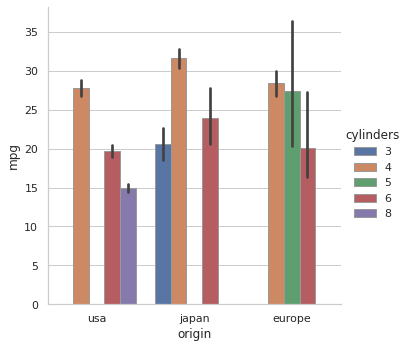

In [109]:
sns.catplot(x = 'origin', y = 'mpg', data = mpg,
            edgecolor = '.6', # 경계선
            hue = 'cylinders', kind = 'bar');

#### 포인트 플롯(Point plots)

* 축의 높이를 사용하여 추정값을 인코딩하여 점 추정값과 신뢰 구간 표시

In [110]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


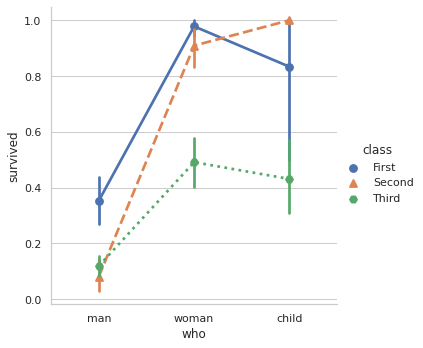

In [117]:
sns.catplot(x = 'who', y = 'survived', data = titanic,
            pallete = ['r','k','g'],
            markers = ['o', '^', 'H'],
            linestyles = ["-", "--", ":"],
            hue = 'class', kind = 'point');

#### 카운트 플롯(Count plots)

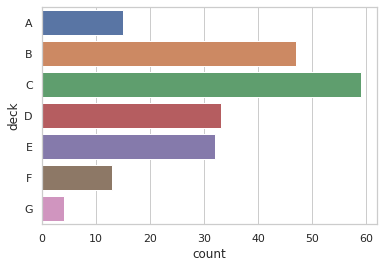

In [118]:
sns.countplot(y = 'deck', data = titanic);

## 분포 시각화(Distribution Visualization)

### 일변량 분포(Univariate distributions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


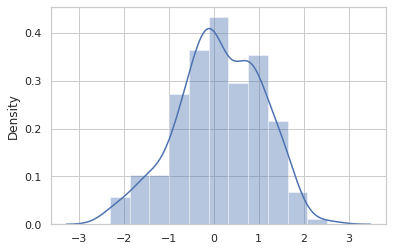

In [120]:
x = np.random.randn(200) 
sns.distplot(x);

#### 히스토그램(Histograms)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


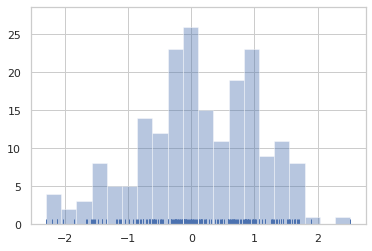

In [124]:
sns.distplot(x, bins = 20, kde = False, rug = True);

#### 커널 밀도 추정(Kernel density estimation)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


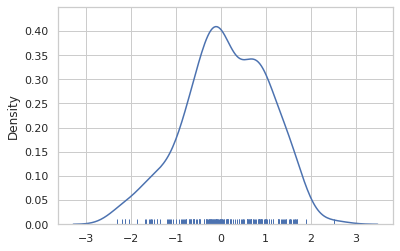

In [126]:
sns.distplot(x, hist = False, rug = True);

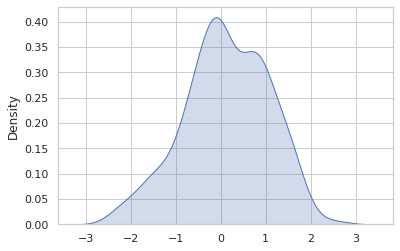

In [127]:
sns.kdeplot(x, shade = True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


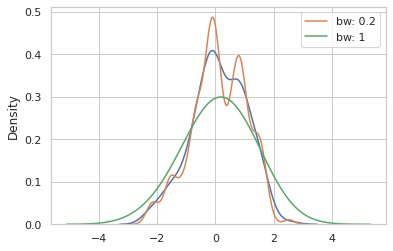

In [128]:
sns.kdeplot(x) 
sns.kdeplot(x, bw = .2, label = 'bw: 0.2')
sns.kdeplot(x, bw = 1, label = "bw: 1") 
plt.legend();

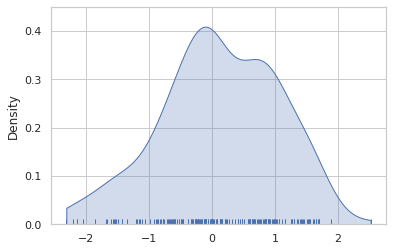

In [129]:
sns.kdeplot(x, shade = True, cut = 0)
sns.rugplot(x);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


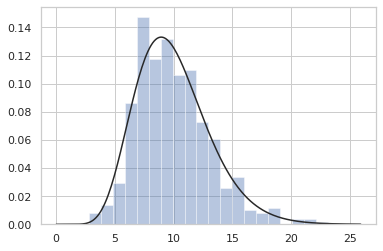

In [131]:
x = np.random.gamma(10, size = 500) 
sns.distplot(x, kde = False, fit = stats.gamma);

### 이변량 분포(Bivariate distributions)

#### 산점도(Scatterplots)

* `jointplot`: 두 개의 변수 간의 이변량(또는 joint) 관계와 별도의 축에 각각의 일변량(또는 marginal) 분포가 모두 표시되는 다중 패널 플롯 생성
* 산점도 + 분포도

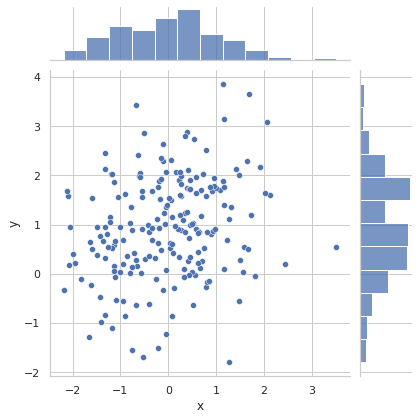

In [134]:
mean = [0, 1]  
cov = [(1, .3), (.3, 1)]
data = np.random.multivariate_normal(mean, cov, 200) 
df = pd.DataFrame(data, columns = ["x", "y"])

sns.jointplot(x = 'x', y = 'y', data = df);

#### 육각 빈 플롯(Hexbin plots)

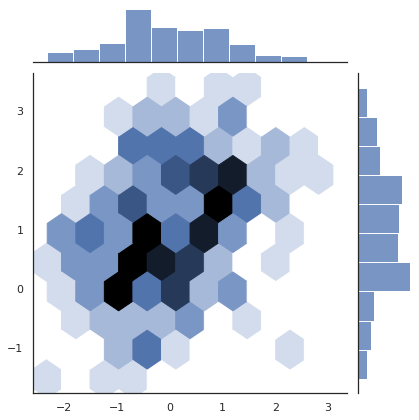

In [139]:
x, y = np.random.multivariate_normal(mean, cov, 200).T 
with sns.axes_style("white"):
  sns.jointplot(x = x, y = y, kind = 'hex')

#### 커널 밀도 추정(Kernel density estimation)

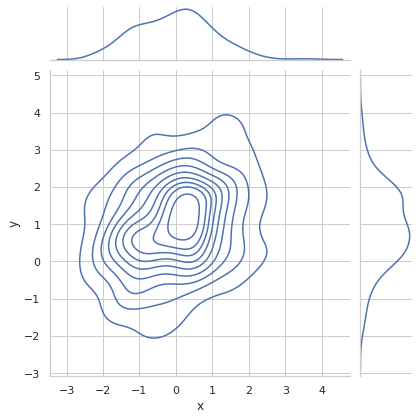

In [140]:
sns.jointplot(x = 'x', y = 'y', data = df, kind = 'kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


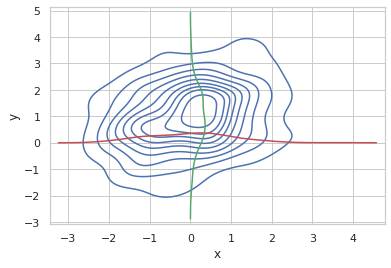

In [142]:
sns.kdeplot(df.x, df.y) 
sns.kdeplot(df.x, color = 'r') 
sns.kdeplot(df.y, color = 'g', vertical = True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2112: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


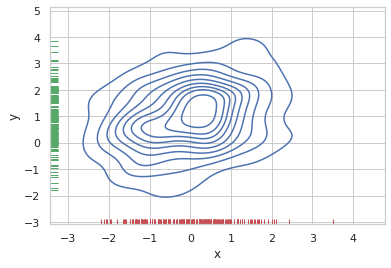

In [143]:
sns.kdeplot(df.x, df.y) 
sns.rugplot(df.x, color = 'r') 
sns.rugplot(df.y, color = 'g', vertical = True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


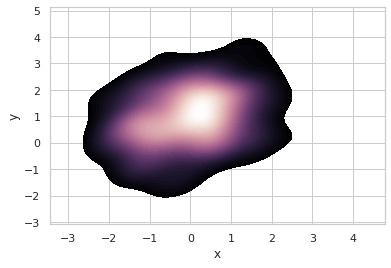

In [146]:
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True) # 어두울수록 0, 밝을수록 1 
sns.kdeplot(df.x, df.y, cmap = cmap, n_levels = 60, shade = True);

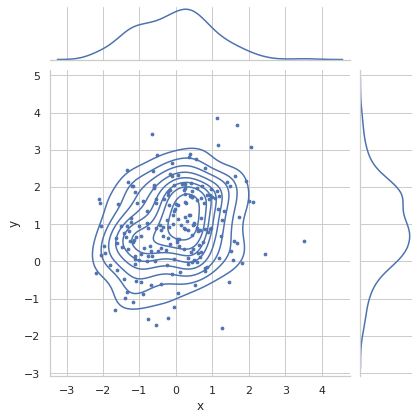

In [147]:
g = sns.jointplot(x = 'x', y = 'y', data = df, kind = 'kde')
g.plot_joint(plt.scatter, s = 30, linewidth = 1, marker = ".")
g.ax_joint.collections[0].set_alpha(0)

### 페어와이즈 관계 시각화(Visualizing pairwise relationships) : 상관관계 시각화

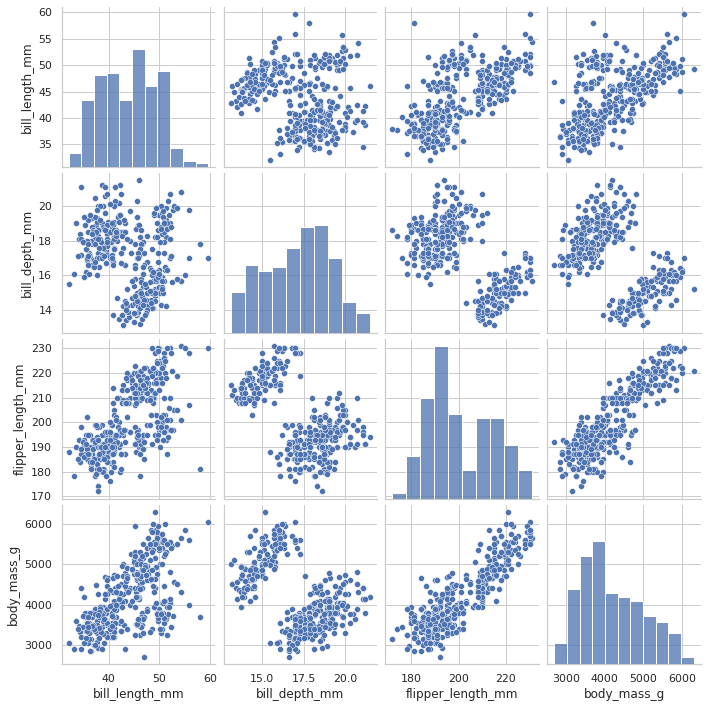

In [148]:
sns.pairplot(penguins);

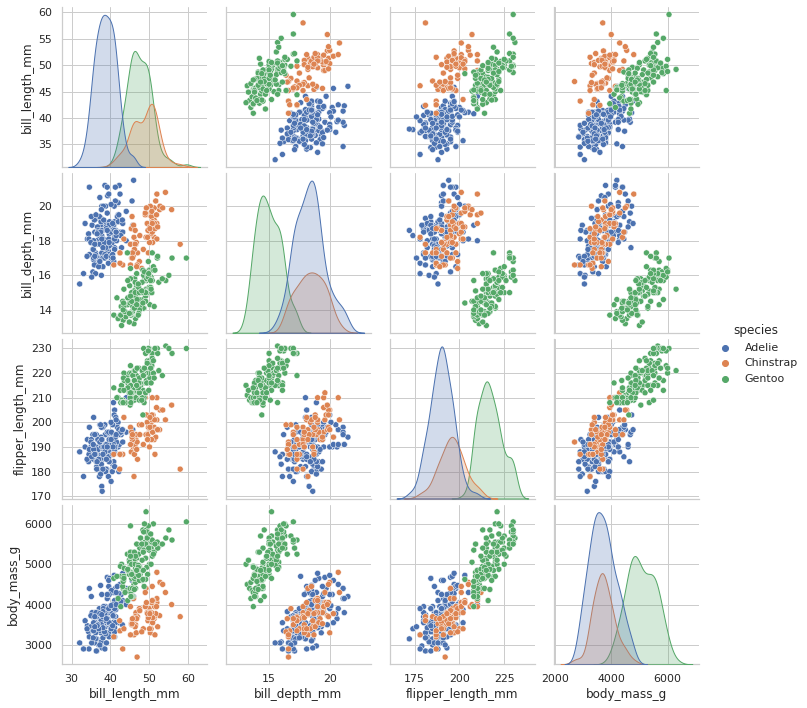

In [149]:
sns.pairplot(penguins, hue = 'species');

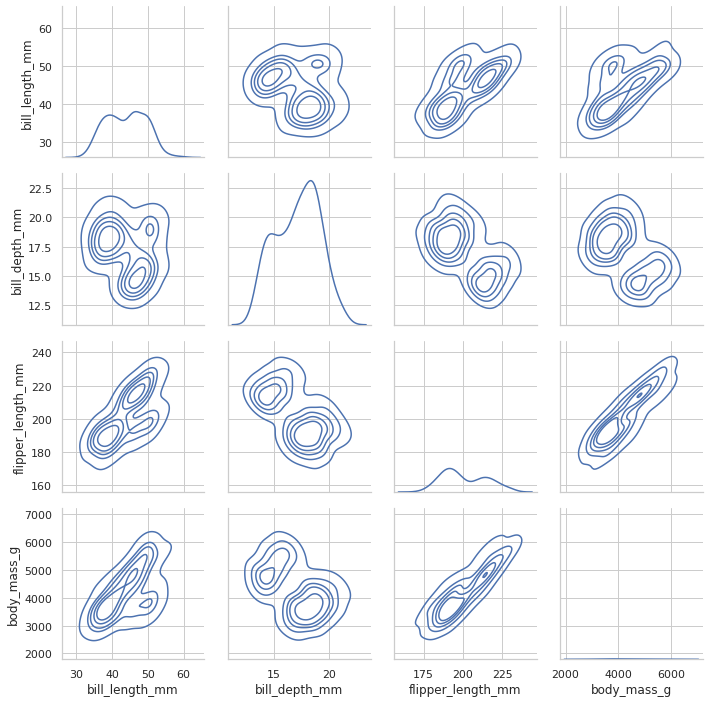

In [150]:
g = sns.PairGrid(penguins) 
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 6);

### 히트맵(Heat Map)

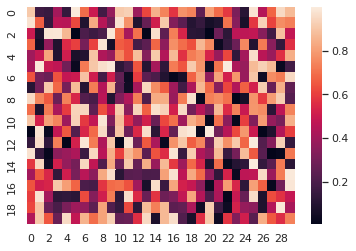

In [152]:
udata = np.random.rand(20, 30) 
sns.heatmap(udata);

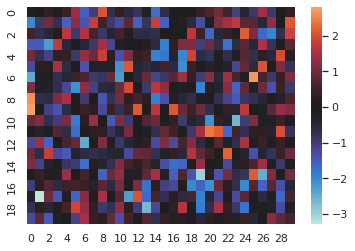

In [154]:
ndata = np.random.randn(20, 30) 
sns.heatmap(ndata, center = 0);

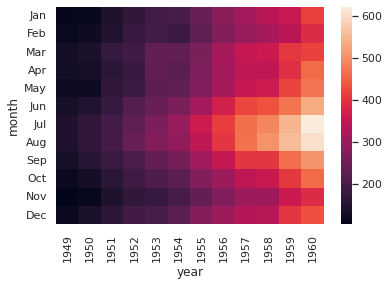

In [156]:
flights_p = flights.pivot('month', 'year', 'passengers') 
sns.heatmap(flights_p);

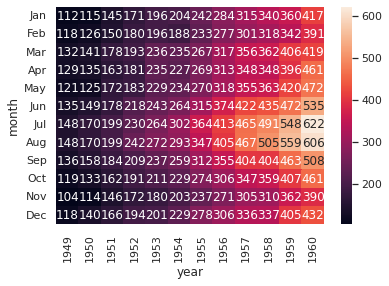

In [159]:
sns.heatmap(flights_p, annot = True, fmt = 'd'); # 숫자 표시

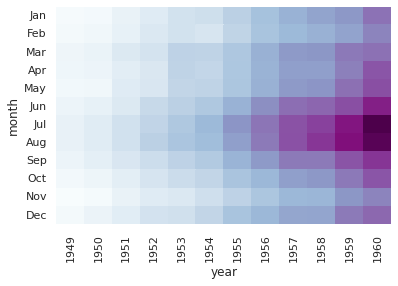

In [164]:
sns.heatmap(flights_p, cmap = "BuPu", # 히트맵 색상 변경
            cbar = False); # 컬러바 삭제

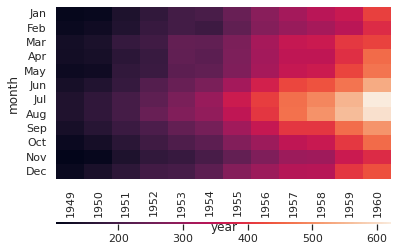

In [167]:
grid_kws = {'height_ratios': {.9, 0.01}, "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw = grid_kws) 
ax = sns.heatmap(flights_p, ax = ax, 
                 cbar_ax = cbar_ax,
                 cbar_kws = {'orientation' : 'horizontal'})

### 클러스터맵(Cluster Map)

In [170]:
brain_networks = sns.load_dataset("brain_networks", header = [0, 1, 2], index_col = 0) 
brain_networks.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

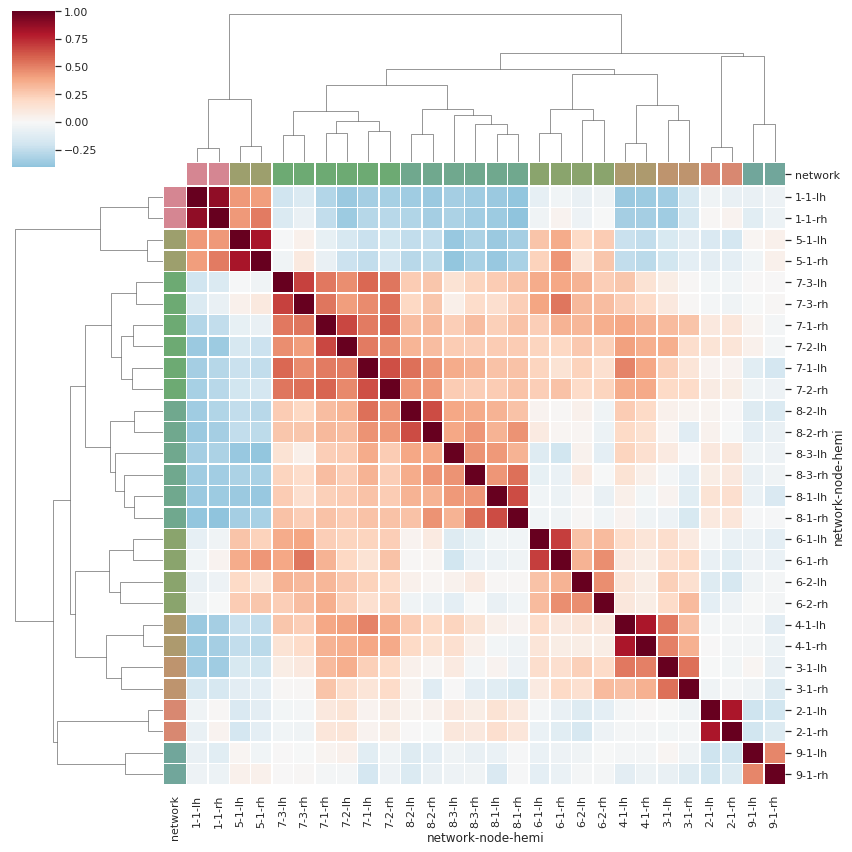

In [179]:
networks = brain_networks.columns.get_level_values("network")
used_networks = np.arange(1, 10) 
used_columns = (networks.astype(int).isin(used_networks)) 
brain_networks = brain_networks.loc[:, used_columns] 

network_pal = sns.husl_palette(17, s = .5)
network_lut = dict(zip(map(str, used_networks), network_pal)) 
network_colors = pd.Series(networks, index = brain_networks.columns).map(network_lut)  

sns.clustermap(brain_networks.corr(), center = 0, cmap = 'RdBu_r',
               row_colors = network_colors, col_colors = network_colors, 
               linewidth = .5, figsize = (12, 12));

## 선형 관계 시각화(Visualizing linear relationships)

### 선형 회귀 모델 시각화 함수

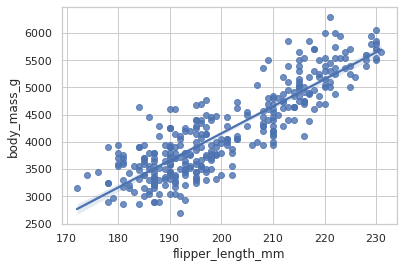

In [181]:
sns.regplot(x = 'flipper_length_mm', y = 'body_mass_g', data = penguins);

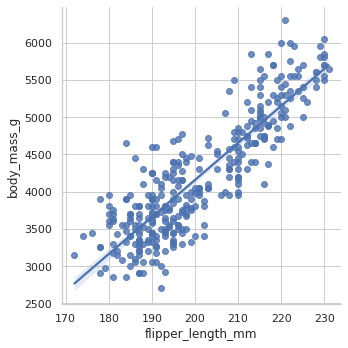

In [182]:
sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', data = penguins);

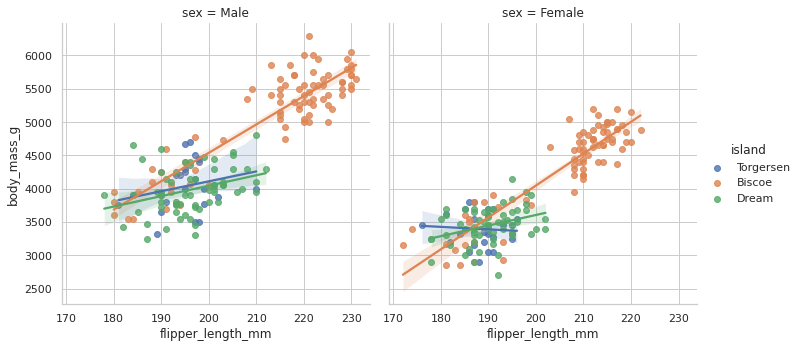

In [184]:
sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', data = penguins,
           col = 'sex', hue = 'island');

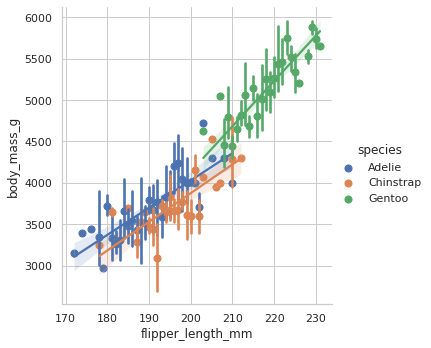

In [185]:
sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', data = penguins, hue = 'species', 
           x_estimator = np.mean); # 평균값들을 표시

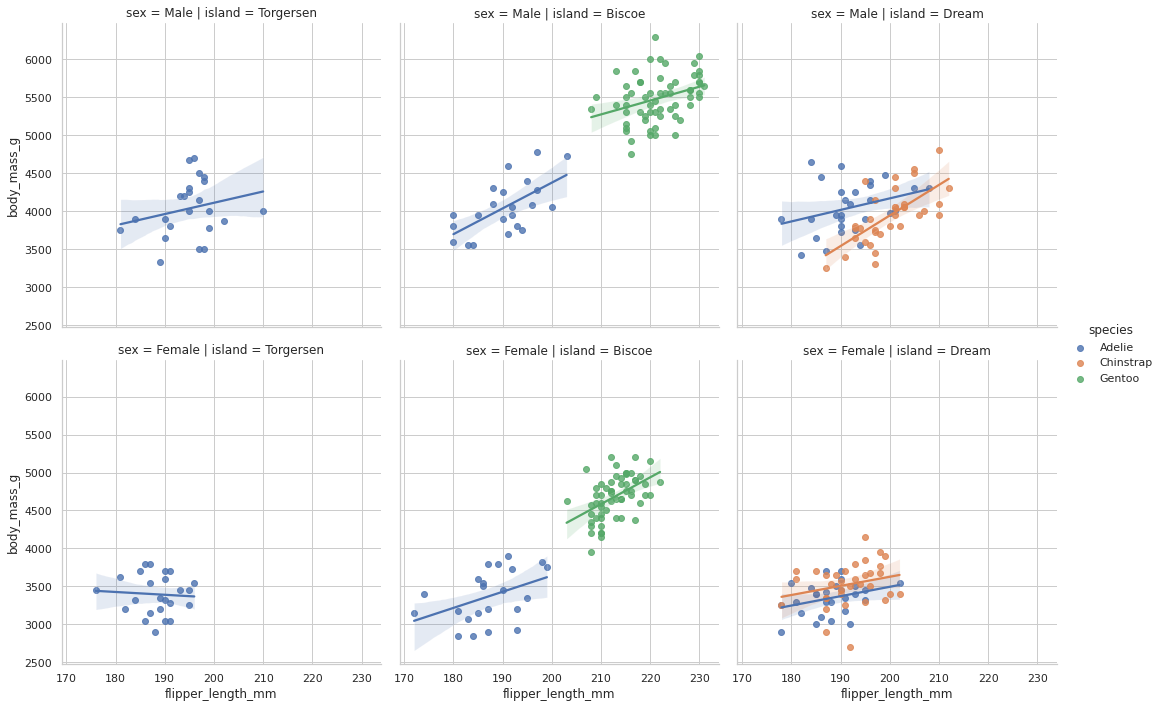

In [189]:
sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', data = penguins,
           row = 'sex', col = 'island', hue = 'species');

### 다른 종류의 모델

In [196]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [198]:
penguins["long_bill"] = (penguins.bill_length_mm > penguins['bill_length_mm'].mean()) 
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,long_bill
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


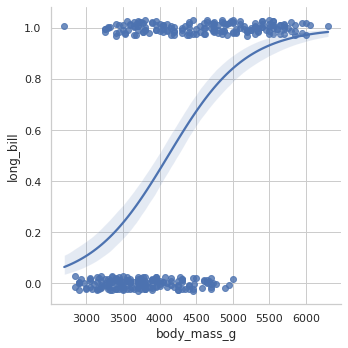

In [205]:
sns.lmplot(x = 'body_mass_g', y = 'long_bill', data = penguins, y_jitter = 0.03,
           logistic = True); # 로지스틱 회귀 곡선

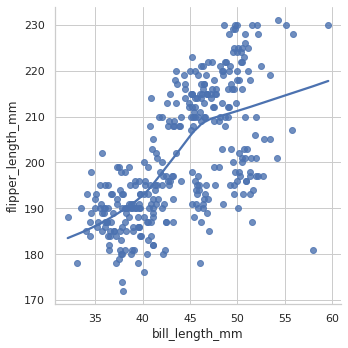

In [206]:
sns.lmplot(x = 'bill_length_mm', y = 'flipper_length_mm',
           lowess = True, data = penguins);

### 다른 상황의 회귀

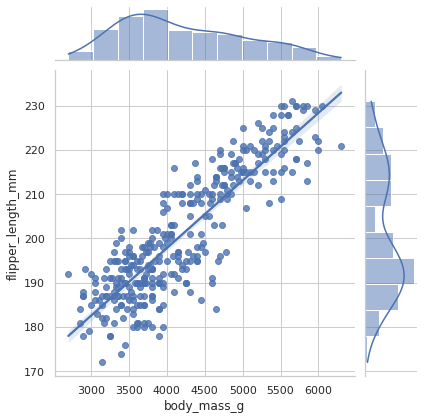

In [208]:
sns.jointplot(x = 'body_mass_g', y = 'flipper_length_mm', 
              kind = 'reg', data = penguins);

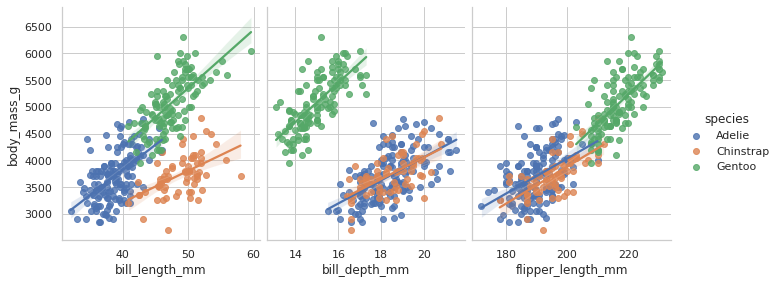

In [210]:
sns.pairplot(penguins,
             x_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars = ['body_mass_g'], hue = 'species',
             height = 4, aspect = .8,
             kind = 'reg');

## 구조화된 다중 플롯 그리드

### FacetGrid

In [211]:
sns.set(style = 'ticks')

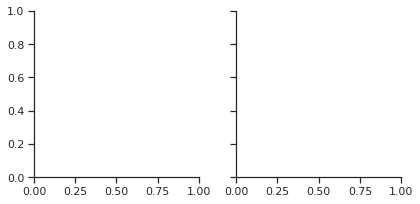

In [212]:
g = sns.FacetGrid(penguins, col = 'sex')

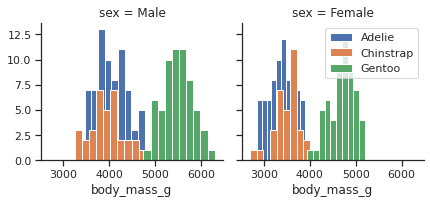

In [220]:
g = sns.FacetGrid(penguins, col = 'sex', hue = 'species')  
g.map(plt.hist, 'body_mass_g');
plt.legend();

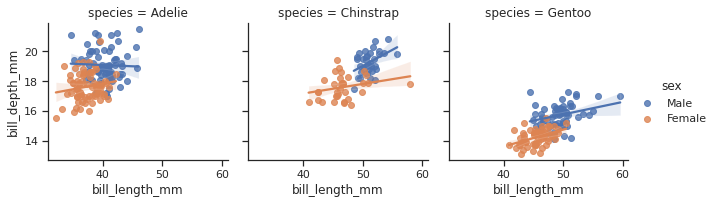

In [221]:
g = sns.FacetGrid(penguins, col = 'species', hue = 'sex') 
g.map(sns.regplot, 'bill_length_mm', 'bill_depth_mm');
g.add_legend();

### 페어와이즈 데이터 관계(pairwise data relationships)

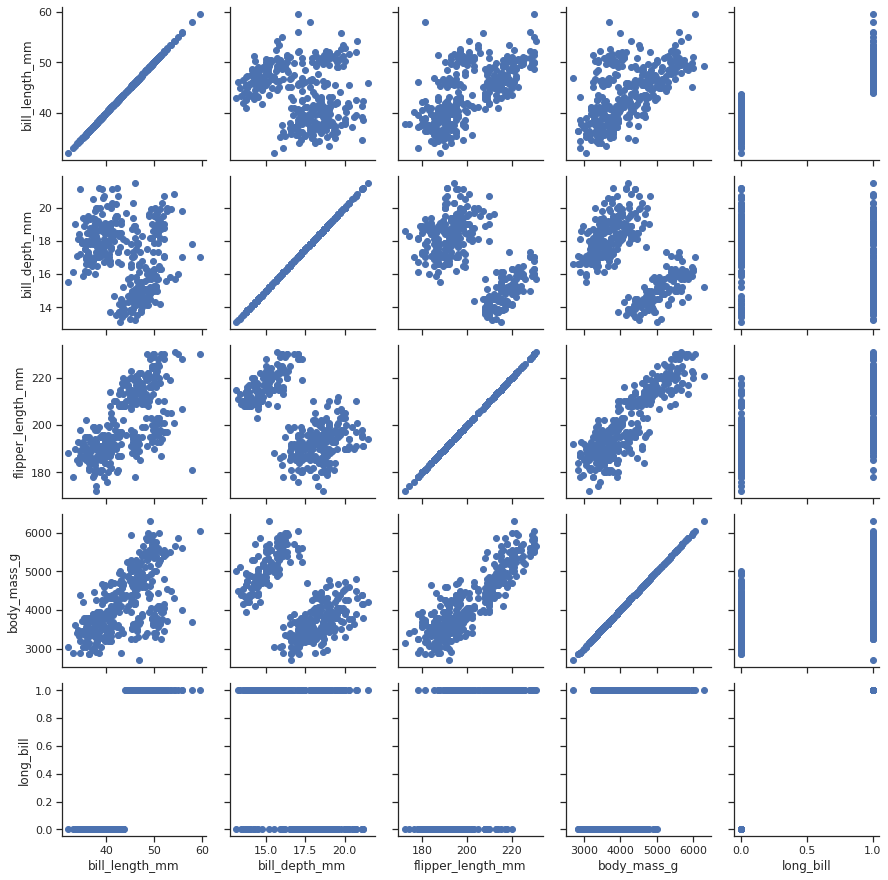

In [223]:
g = sns.PairGrid(penguins) 
g.map(plt.scatter);

In [ ]:
g = sns.PairGrid(penguins) 
g.map_diag(plt.hist) # 대각부분만 히스토그램
g.map_offdiag(plt.scatter); # 대각이외의 부분은 산점도

## 그림 미학 제어

### Seaborn 스타일

In [ ]:
def randplot(flip = 1):
  for i in range(1, 7):
    plt.plot(np.random.randn(50).cumsum()); 

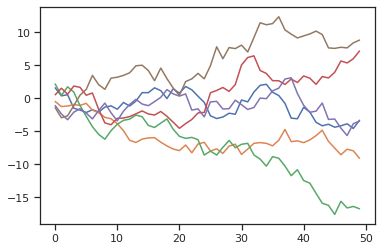

In [ ]:
randplot();

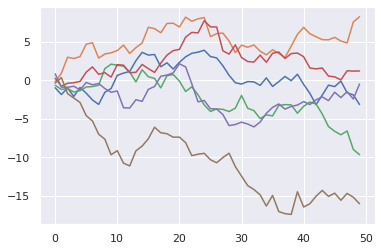

In [ ]:
sns.set()
randplot();

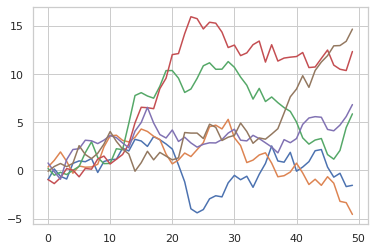

In [ ]:
sns.set_style('whitegrid')
randplot();

### 스타일 요소 재정의

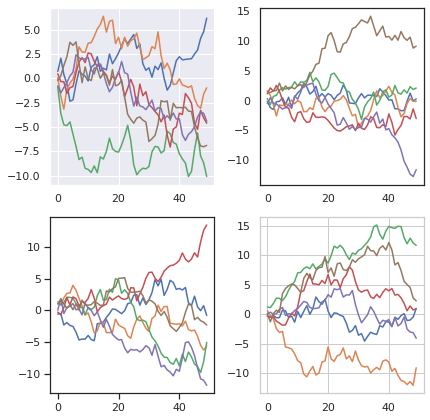

In [240]:
f = plt.figure(figsize = (6, 6))
gs = f.add_gridspec(2, 2) 

with sns.axes_style('darkgrid') :
  ax = f.add_subplot(gs[0, 0])
  randplot()

with sns.axes_style('white') :
  ax = f.add_subplot(gs[0, 1])
  randplot()

with sns.axes_style('ticks') :
  ax = f.add_subplot(gs[1, 0])
  randplot()

with sns.axes_style('whitegrid') :
  ax = f.add_subplot(gs[1, 1])
  randplot() 

f.tight_layout()

In [241]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

### 스케일링 플롯 요소

In [242]:
sns.set() 

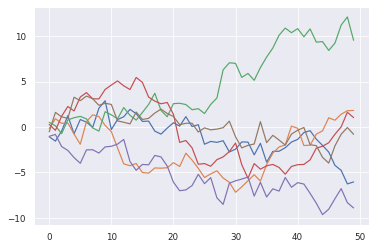

In [243]:
sns.set_context("paper")
randplot();

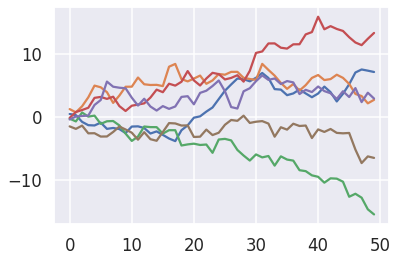

In [244]:
sns.set_context("talk")
randplot();

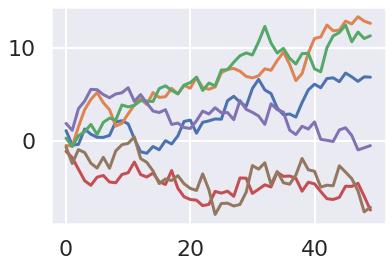

In [245]:
sns.set_context("poster")
randplot();

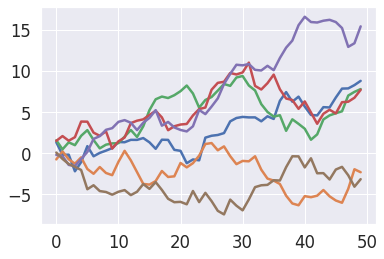

In [246]:
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 2.5})
randplot();

## 컬러 팔레트 선택

In [247]:
sns.set()

### 질적 색상 팔레트

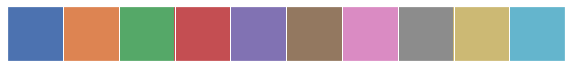

In [249]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

#### xkcd 색상 측량에서 정의된 색상 사용

* xkcd 색상표: https://xkcd.com/color/rgb/

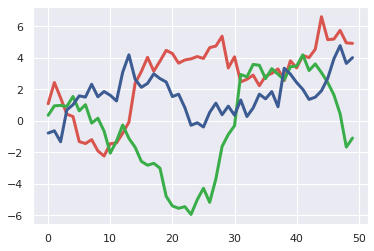

In [251]:
plt.plot(np.random.randn(50).cumsum(), sns.xkcd_rgb["pale red"], lw = 3)
plt.plot(np.random.randn(50).cumsum(), sns.xkcd_rgb["medium green"], lw = 3)
plt.plot(np.random.randn(50).cumsum(), sns.xkcd_rgb["denim blue"], lw = 3)

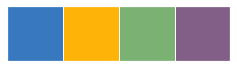

In [256]:
colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

### 순차 색상 팔레트

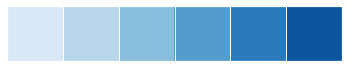

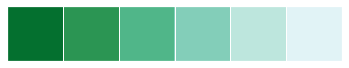

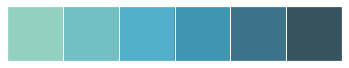

In [257]:
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("BuGn_r"))
sns.palplot(sns.color_palette("GnBu_d"))

#### 순차적 입방체 팔레트

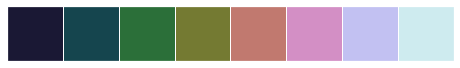

In [258]:
sns.palplot(sns.color_palette("cubehelix", 8))

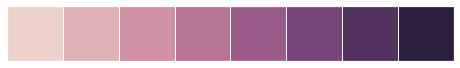

In [259]:
sns.palplot(sns.cubehelix_palette(8))

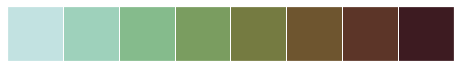

In [261]:
sns.palplot(sns.cubehelix_palette(8, start = .5, rot = .75))

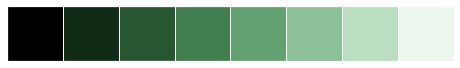

In [262]:
sns.palplot(sns.cubehelix_palette(8, start = 2, rot = 0, dark = 0, light = 0.95, reverse = True))